# 0. Import dependencies

In [160]:
import torch
import sklearn
import numpy as np


In [161]:
from sklearn.datasets import make_classification
torch.manual_seed(123)


# 1. Working with datasets

## 1.1 Creating the datasets
Creating a toy dataset with `sklearn.make_classification()`.

In [162]:
# Make a Toy Dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2)

# Change it into the Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [211]:
print(f'X: {X.ndim} dim(s)\n', X, '\n\nShape of X: ', np.shape(X), sep='')

X: 2 dims
tensor([[ 0.7803,  0.9799, -1.2698,  1.3255],
        [-1.1299,  1.1527,  0.2890,  0.0459],
        [-0.8098, -0.6370,  1.0887, -1.0852],
        ...,
        [ 0.7371,  0.7865, -1.1156,  1.1458],
        [-0.8079, -0.9616,  1.2827, -1.3319],
        [ 0.7635,  0.8054, -1.1500,  1.1797]])

Shape of X: torch.Size([1000, 4])


In [213]:
print(f'y: {y.ndim} dim(s)\n', y, '\n\nShape of y: ', np.shape(y), sep='')

y: 1 dims
tensor([1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
        1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 1., 1.

## 1.2 Shuffling the datasets
Shuffling using the `torch.randperm()` function. Learn more about this function [here](https://pytorch.org/docs/stable/generated/torch.randperm.html).

Here, the first argument needs to be the size `n` in `int`. The `y.size()` simply won't work since the `torch.Tensor.size()` function returns the size as an object. We pass in the first dimension (0th) to retrieve size of the first dim in `int`. Values other than 0 won't work since this tensor only has one dim. 

In [165]:
# Shuffling data
torch.manual_seed(10)

# Creating a shuffled dataset ranging from 0 to n - 1 (999)
shuffledData = torch.randperm(y.size(0), dtype=torch.long)

# Printing a sample from our shuffled data
print(f'Sampled shuffled data:\n\n{shuffledData[:10]}')


Sampled shuffled data:

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])


In [166]:
print(f'Shuffled generated data:\n\n{shuffledData}')

Shuffled generated data:

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714, 726, 238, 593, 108,
        226, 353, 680, 292, 312, 204, 428, 317, 164, 615, 679, 159, 886, 210,
        647, 603, 774, 360,  40, 173, 672, 744, 383, 824, 485, 811, 437, 386,
        917, 310, 977, 636, 478, 869, 358, 743, 216, 735,  99, 770, 690, 101,
        874, 509, 967, 303, 739, 273, 440, 115, 876, 104, 370, 394, 907, 182,
        402, 612, 207, 215, 469, 961,  94, 979, 459, 806, 609, 375,  66, 638,
        980,  50, 781, 135, 831, 357,  27, 451, 408, 355, 398, 367, 623, 930,
        498, 189, 585, 549, 678, 796, 978, 648, 673, 955,  45, 987, 954, 959,
        414, 643, 711, 731, 692, 950, 838, 206, 785, 244, 423,  37, 633, 875,
        291, 776, 333,  18, 936, 846, 171, 213, 730, 547, 666, 178, 488, 365,
        323, 445, 481, 535, 933, 657, 998, 832, 422, 768, 778, 343, 913, 337,
        863, 803, 121, 286, 250, 176, 305, 167, 684, 139, 299, 887, 943,  85,
        988, 667,  48, 762, 646, 510, 

In [167]:
X[5]

tensor([ 0.7816, -0.2369,  0.4286, -0.7026])

In [168]:
X, y = X[shuffledData], y[shuffledData]

In [208]:
# shuffledData[5]
shuffledData.ndim
# type(shuffledData[5])

1

In [169]:
X[5]

tensor([0.9873, 1.1535, 1.6854, 0.1081])

In [170]:
print(f'Shuffled X:\n\n{X}')

Shuffled X:

tensor([[ 0.8068,  0.2336,  0.8190, -0.3976],
        [ 2.3216,  2.5987,  3.8737,  0.1763],
        [-0.1628,  0.1709,  0.0064,  0.2297],
        ...,
        [-1.8000, -0.9641, -2.1759,  0.5835],
        [ 0.5968,  1.1419,  1.3690,  0.3701],
        [-2.0778, -0.0174, -1.6490,  1.4244]])


In [171]:
print(f'Shuffled y:\n\n{y}')

Shuffled y:

tensor([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 0., 1.,

## 1.3 Splitting the dataset into training and testing data

### 1.3.1 Working with shuffled data

In [172]:
# Train Test split
shuffledTrainDataMakeup = int(shuffledData.size(0) * 0.7)

shuffledTrainData = shuffledData[:shuffledTrainDataMakeup]
shuffledTestData = shuffledData[shuffledTrainDataMakeup:]


How much does the training data make up of the actual dataset.

In [173]:
print(f'Training data makeup: {shuffledTrainDataMakeup}\n\n')


Training data makeup: 700




Details of the training data.

In [174]:
print(f'Printing details of training data\n\nShape: {np.shape(shuffledTrainData)}\n\nData:\n{shuffledTrainData}')


Printing details of training data

Shape: torch.Size([700])

Data:
tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714, 726, 238, 593, 108,
        226, 353, 680, 292, 312, 204, 428, 317, 164, 615, 679, 159, 886, 210,
        647, 603, 774, 360,  40, 173, 672, 744, 383, 824, 485, 811, 437, 386,
        917, 310, 977, 636, 478, 869, 358, 743, 216, 735,  99, 770, 690, 101,
        874, 509, 967, 303, 739, 273, 440, 115, 876, 104, 370, 394, 907, 182,
        402, 612, 207, 215, 469, 961,  94, 979, 459, 806, 609, 375,  66, 638,
        980,  50, 781, 135, 831, 357,  27, 451, 408, 355, 398, 367, 623, 930,
        498, 189, 585, 549, 678, 796, 978, 648, 673, 955,  45, 987, 954, 959,
        414, 643, 711, 731, 692, 950, 838, 206, 785, 244, 423,  37, 633, 875,
        291, 776, 333,  18, 936, 846, 171, 213, 730, 547, 666, 178, 488, 365,
        323, 445, 481, 535, 933, 657, 998, 832, 422, 768, 778, 343, 913, 337,
        863, 803, 121, 286, 250, 176, 305, 167, 684, 139, 299, 887, 943,  8

Details of the testing data.

In [175]:
print(f'Printing details of testing data\n\nShape: {np.shape(shuffledTestData)}\n\nData:\n{shuffledTestData}')


Printing details of testing data

Shape: torch.Size([300])

Data:
tensor([313, 279, 258, 960, 532, 419,  49, 777, 435, 444, 387,  23,  17, 566,
        862, 637, 728,  34,  19, 274, 331, 760, 508, 149, 893, 563, 596, 991,
        941, 565,   1, 780, 161, 461, 452, 883, 900, 569, 556, 334,  64, 839,
        122, 308, 561, 516, 567,  90, 616, 184, 396, 138, 687, 344, 338, 528,
        554, 868, 504, 976,  91, 113, 536, 490, 527, 804, 605, 854, 424, 235,
         67, 350, 601, 879, 821, 152, 621, 829, 473,  39, 825, 241, 653, 709,
        624, 472,  42, 755,  25, 622, 906, 287, 165, 125, 916, 660, 223, 446,
        691, 947, 878, 546,  68, 328, 911, 515, 434,   3, 203, 787, 181,   7,
        335, 822, 852, 289, 295, 708, 698, 826, 577, 695, 923, 788, 456, 482,
        881, 631, 132,  79, 477, 202, 404,   8, 619, 651, 506, 704, 772, 175,
        696, 985, 501,  26, 884, 511, 591, 222, 234, 194, 426, 540,  36, 608,
        146, 867, 694, 147, 284, 519, 517, 427, 830, 964, 293, 652, 948, 815

In [176]:
X_train, y_train = X[shuffledTrainData], y[shuffledTrainData]
# X_test, y_test = X[testDataSize], y[testDataSize]

In [177]:
np.shape(X_train)

torch.Size([700, 4])

In [178]:
X_train.shape

torch.Size([700, 4])

In [179]:
X_test.shape

torch.Size([300, 4])

In [180]:
#### Normalize

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [181]:
import torch.nn as nn
from torch.autograd import grad

In [182]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [183]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    shuffledData=torch.randperm(y.size(0))
    batches=torch.split(shuffledData,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost




In [184]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.47176
Epoc:   2 | MSE  0.44580
Epoc:   3 | MSE  0.42192
Epoc:   4 | MSE  0.39992
Epoc:   5 | MSE  0.37966
Epoc:   6 | MSE  0.36097
Epoc:   7 | MSE  0.34372
Epoc:   8 | MSE  0.32779
Epoc:   9 | MSE  0.31307
Epoc:  10 | MSE  0.29945
Epoc:  11 | MSE  0.28685
Epoc:  12 | MSE  0.27517
Epoc:  13 | MSE  0.26435
Epoc:  14 | MSE  0.25431
Epoc:  15 | MSE  0.24500
Epoc:  16 | MSE  0.23634
Epoc:  17 | MSE  0.22830
Epoc:  18 | MSE  0.22082
Epoc:  19 | MSE  0.21387
Epoc:  20 | MSE  0.20739
Epoc:  21 | MSE  0.20135
Epoc:  22 | MSE  0.19572
Epoc:  23 | MSE  0.19048
Epoc:  24 | MSE  0.18558
Epoc:  25 | MSE  0.18101
Epoc:  26 | MSE  0.17674
Epoc:  27 | MSE  0.17275
Epoc:  28 | MSE  0.16901
Epoc:  29 | MSE  0.16552
Epoc:  30 | MSE  0.16225
Epoc:  31 | MSE  0.15919
Epoc:  32 | MSE  0.15632
Epoc:  33 | MSE  0.15363
Epoc:  34 | MSE  0.15110
Epoc:  35 | MSE  0.14874
Epoc:  36 | MSE  0.14652
Epoc:  37 | MSE  0.14444
Epoc:  38 | MSE  0.14249
Epoc:  39 | MSE  0.14065
Epoc:  40 | MSE  0.13892


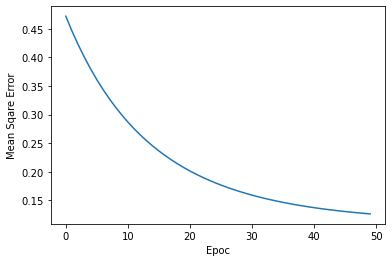

In [185]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [186]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 83.71
Testing Accuracy: 50.67


### Model Using Pytorch

In [187]:
import torch
import sklearn
import torch.nn.functional as F

In [188]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [189]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [191]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)



    

In [192]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    shuffledData=torch.randperm(y.size(0))
    batches=torch.split(shuffledData,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [193]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [194]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.47704
Epoc:   2 | MSE  0.44738
Epoc:   3 | MSE  0.42065
Epoc:   4 | MSE  0.39647
Epoc:   5 | MSE  0.37455
Epoc:   6 | MSE  0.35463
Epoc:   7 | MSE  0.33649
Epoc:   8 | MSE  0.31994
Epoc:   9 | MSE  0.30478
Epoc:  10 | MSE  0.29089
Epoc:  11 | MSE  0.27810
Epoc:  12 | MSE  0.26632
Epoc:  13 | MSE  0.25547
Epoc:  14 | MSE  0.24542
Epoc:  15 | MSE  0.23613
Epoc:  16 | MSE  0.22751
Epoc:  17 | MSE  0.21950
Epoc:  18 | MSE  0.21205
Epoc:  19 | MSE  0.20512
Epoc:  20 | MSE  0.19865
Epoc:  21 | MSE  0.19261
Epoc:  22 | MSE  0.18697
Epoc:  23 | MSE  0.18170
Epoc:  24 | MSE  0.17676
Epoc:  25 | MSE  0.17213
Epoc:  26 | MSE  0.16779
Epoc:  27 | MSE  0.16372
Epoc:  28 | MSE  0.15990
Epoc:  29 | MSE  0.15631
Epoc:  30 | MSE  0.15294
Epoc:  31 | MSE  0.14976
Epoc:  32 | MSE  0.14678
Epoc:  33 | MSE  0.14397
Epoc:  34 | MSE  0.14132
Epoc:  35 | MSE  0.13883
Epoc:  36 | MSE  0.13649
Epoc:  37 | MSE  0.13427
Epoc:  38 | MSE  0.13219
Epoc:  39 | MSE  0.13022
Epoc:  40 | MSE  0.12837


[]

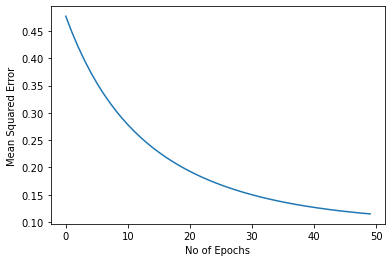

In [195]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [196]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.87
Testing Accuracy: 0.87


### Logistic Regression

In [197]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    shuffledData=torch.randperm(y.size(0))
    batches=torch.split(shuffledData,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [198]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [199]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.50016
Epoc:   2 | MSE  0.49075
Epoc:   3 | MSE  0.48176
Epoc:   4 | MSE  0.47317
Epoc:   5 | MSE  0.46499
Epoc:   6 | MSE  0.45719
Epoc:   7 | MSE  0.44976
Epoc:   8 | MSE  0.44271
Epoc:   9 | MSE  0.43601
Epoc:  10 | MSE  0.42967
Epoc:  11 | MSE  0.42366
Epoc:  12 | MSE  0.41799
Epoc:  13 | MSE  0.41265
Epoc:  14 | MSE  0.40762
Epoc:  15 | MSE  0.40290
Epoc:  16 | MSE  0.39848
Epoc:  17 | MSE  0.39435
Epoc:  18 | MSE  0.39051
Epoc:  19 | MSE  0.38695
Epoc:  20 | MSE  0.38365
Epoc:  21 | MSE  0.38063
Epoc:  22 | MSE  0.37786
Epoc:  23 | MSE  0.37534
Epoc:  24 | MSE  0.37306
Epoc:  25 | MSE  0.37103
Epoc:  26 | MSE  0.36922
Epoc:  27 | MSE  0.36765
Epoc:  28 | MSE  0.36629
Epoc:  29 | MSE  0.36515
Epoc:  30 | MSE  0.36421
Epoc:  31 | MSE  0.36348
Epoc:  32 | MSE  0.36295
Epoc:  33 | MSE  0.36261
Epoc:  34 | MSE  0.36246
Epoc:  35 | MSE  0.36250
Epoc:  36 | MSE  0.36271
Epoc:  37 | MSE  0.36309
Epoc:  38 | MSE  0.36365
Epoc:  39 | MSE  0.36437
Epoc:  40 | MSE  0.36525


[]

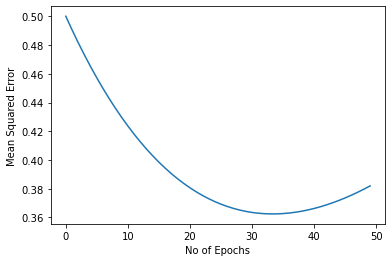

In [200]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [201]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.81
Testing Accuracy: 0.82
